In [195]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Specify the folder path
folder_path = "/Users/elias/Desktop/physics-111B/NMR/NMR-data/"
subfolder_list = os.listdir(folder_path)

# Specify the folder to save plots
save_folder = "/Users/elias/Desktop/physics-111B/NMR/Plots/"
os.makedirs(save_folder, exist_ok=True)  # Create the folder if it doesn't exist


for subfolder_name in subfolder_list:

    if subfolder_name == ".DS_Store" or subfolder_name == "Ignore":
        continue

    subfolder_path = os.path.join(folder_path, subfolder_name)
    
    # Get a list of all files in the folder
    file_list = os.listdir(subfolder_path)

    # Loop through each file in the folder
    for file_name in file_list:
        if file_name == ".DS_Store":
                continue
        
        # Construct the full path to the file
        file_path = os.path.join(subfolder_path, file_name)

        # Load NMR data
        nmr_data = np.loadtxt(file_path)

        # Display basic information about the data
        print(f"\nFile: {file_name}")
        print("Shape of the NMR data:", nmr_data.shape)
        print("First few rows of the data:")
        print(nmr_data[:5, :])

        # Plot the NMR signal
        x = nmr_data[:, 0]  # Assuming the first column is time
        signal = nmr_data[:, 1]  # Assuming the second column is the NMR signal

        plt.figure(figsize=(12, 6))
        if subfolder_name == "pulse-data":
            #plt.vlines([np.sort(nmr_data[:, :], 1)[0]], 0, np.max(signal), colors = "red")
            plt.title(f'Pulse Wave NMR Signal - {file_name}')
            plt.xlabel('Time (s)')
            plt.plot(x, signal, label='NMR Signal')
        elif subfolder_name == "XY-traces":
            plt.title(f'Continuous Wave XY Trace - {file_name}')
            plt.xlabel('B-field Modulation (G)')
            plt.plot(x*2.805127689, signal, label='NMR Signal')
        else:
            plt.title(f'Continous Wave NMR - Lock-In Amplifier - {file_name}')
            plt.xlabel('Time (s)')
            plt.plot(x, signal, label='NMR Signal')
        plt.ylabel('Average Signal (V)')
        plt.legend()
        plt.grid(True)

        # Save the plot
        save_path = os.path.join(save_folder, f'{subfolder_name}_{file_name + ".png"}')
        plt.savefig(save_path, bbox_inches='tight')

        plt.show()

NotADirectoryError: [WinError 267] The directory name is invalid: '/Users/elias/Desktop/physics-111B/NMR/NMR-data/line_width_measurements.txt'

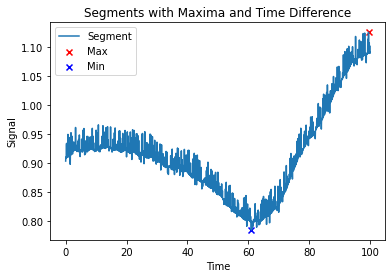

Time Difference: 38.50000 seconds


In [ ]:
def measure_time_difference(segment_time, segment_signal):
    # Find the index of the maximum value in each segment
    max_index = np.argmax(segment_signal)
    min_index = np.argmin(segment_signal)

    # Get the time of the maximum value in each segment
    max_time = segment_time[max_index]
    min_time = segment_time[min_index]

    # Calculate the time difference between the maxima
    time_difference = np.abs(min_time - max_time)

    # Plot the data
    plt.plot(segment_time, segment_signal, label='Segment')
    
    # Mark the maxima with red crosses
    plt.scatter(max_time, segment_signal[max_index], color='red', marker='x', label='Max')
    plt.scatter(min_time, segment_signal[min_index], color='blue', marker='x', label='Min')

    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend()
    plt.title('Segments with Maxima and Time Difference')
    plt.show()

    return time_difference

def read_and_measure_time_difference(filename, segment1_range):
    # Load data from the txt file
    data = np.loadtxt(filename, delimiter='\t')
    time, signal = data[:, 0]-data[0,0], data[:, 1]

    # Extract segments based on specified ranges
    segment1_indices = np.where((time >= segment1_range[0]) & (time <= segment1_range[1]))[0]

    # Create segments
    segment1_time = time[segment1_indices]
    segment1_signal = signal[segment1_indices]

    # Measure time difference
    time_difference = measure_time_difference(segment1_time, segment1_signal)

    return time_difference

filename = r'C:\Users\elias\Desktop\physics-111B\NMR\NMR-data\lock-in-data\Mn 1'

segment = (0, 100)

time_diff = read_and_measure_time_difference(filename, segment)
print(f"Time Difference: {time_diff:.5f} seconds")

[ 0.76356841 -0.47813159  0.18476841 -0.12613159  0.08856841 -0.07883159
  0.06056841 -0.05773159  0.05666841 -0.04693159  0.04666841 -0.04373159
  0.04236841 -0.03653159  0.03876841 -0.03213159  0.03476841 -0.02653159
  0.03496841 -0.02093159  0.03176841 -0.01773159  0.02706841 -0.01493159
  0.02726841 -0.01093159  0.02366841 -0.01373159  0.02136841 -0.01503159
  0.02076841 -0.01283159  0.01406841 -0.01473159]
[0.76356841 0.47813159 0.18476841 0.12613159 0.08856841 0.07883159
 0.06056841 0.05773159 0.05666841 0.04693159 0.04666841 0.04373159
 0.04236841 0.03653159 0.03876841 0.03213159 0.03476841 0.02653159
 0.03496841 0.02093159 0.03176841 0.01773159 0.02706841 0.01493159
 0.02726841 0.01093159 0.02366841 0.01373159 0.02136841 0.01503159
 0.02076841 0.01283159 0.01406841 0.01473159]
Optimized Parameters:
A = 0.9435541532224503
tau = 0.022017958757251103
D = 0.6698867782958345


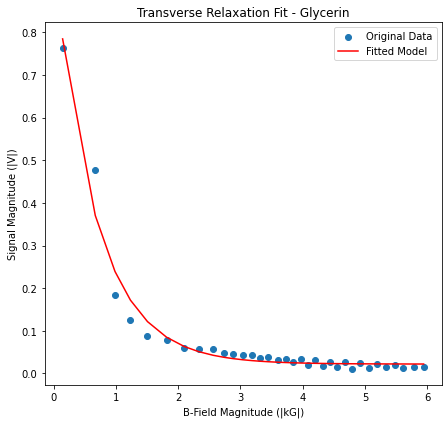

In [ ]:
from scipy.optimize import curve_fit
from scipy.fft import fft

# Define the model function (sinusoidal with exponential gain)
def model_function(x, A, D, tau):
    return A * np.exp(-x / tau) + D

# Load data from file
file_path = r'C:\Users\elias\Desktop\physics-111B\NMR\NMR-data\XY-traces\Glycerin Below Resonance - Peaks'
data = np.loadtxt(file_path)

# Separate data into X and Y arrays
x_data = data[:, 0]*2.805127689
y_data = data[:, 1]+0.061868409875604526
print(y_data)
for i in range(len(y_data)):
    if i%2:
        y_data[i]=abs(y_data[i])

print(y_data)

# Initial guess parameters (adjust as needed)
initial_guess = [1.0, -0.7, 1]

# Perform curve fitting
popt, pcov = curve_fit(model_function, -x_data, y_data, p0=initial_guess)

# Print the optimized parameters
print("Optimized Parameters:")
print("A =", popt[0])
print("tau =", popt[1])
print("D =", popt[2])

# Plot the original data and the fitted model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(-x_data, y_data, label='Original Data')
plt.plot(-x_data, model_function(-x_data, *popt), 'r', label='Fitted Model')
plt.xlabel('B-Field Magnitude (|kG|)')
plt.ylabel('Signal Magnitude (|V|)')
plt.legend()
plt.title('Transverse Relaxation Fit - Glycerin')

# # Perform FFT
# dt = x_data[1] - x_data[0]  # Assuming a constant time step
# n = len(x_data)
# frequencies = np.fft.fftfreq(n, dt)
# fft_values = fft(y_data)

# # Plot in frequency space
# plt.subplot(1, 2, 2)
# plt.plot(frequencies, np.abs(fft_values))
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude')
# plt.title('Fourier Transform of Data')

plt.tight_layout()
plt.show()

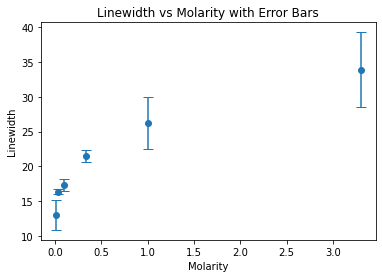

In [194]:
import pandas as pd

filename = r'C:\Users\elias\Desktop\physics-111B\NMR\NMR-data\line_width_measurements.txt'
df = pd.read_csv(filename, delimiter='\t')

# Calculate mean linewidth and standard deviation for each molarity
linewidth_stats = df.groupby('Molarity')['dt'].agg(['mean', 'std']).reset_index()

# Plot the data with error bars
plt.errorbar(linewidth_stats['Molarity']*0.005*0.014, linewidth_stats['mean'], yerr=linewidth_stats['std'], fmt='o', capsize=5)
plt.xlabel('Molarity')
plt.ylabel('Linewidth')
plt.title('Linewidth vs Molarity with Error Bars')
plt.show()